In [18]:
project_id = "${project_id}"
dataset_id = "${dataset_id}"
table_id = "${table_id}"

In [21]:
from google.cloud import bigquery
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

client = bigquery.Client(project=project_id)

df = client.query(f'''
SELECT ticker, cast(price AS FLOAT64) AS price, CAST(OFFSET as INTEGER) AS offset, start_date, end_date, iteration
FROM `{project_id}.{dataset_id}.{table_id}`,
UNNEST(simulation_results) as NUMERIC with OFFSET
WHERE  epoch_time IN
 # Get the latest simulation runs for each Ticker Symbol
(SELECT MAX(epoch_time)  FROM `{project_id}.{dataset_id}.{table_id}`  GROUP BY ticker)
'''
).to_dataframe()
# Display the data
df

,ticker,price,offset,start_date,end_date,iteration
0,GOOG,88.022104,0,2020-01-01,2020-12-31,0
1,GOOG,90.394495,1,2020-01-01,2020-12-31,0
2,GOOG,90.628801,2,2020-01-01,2020-12-31,0
3,GOOG,89.875747,3,2020-01-01,2020-12-31,0
4,GOOG,90.536110,4,2020-01-01,2020-12-31,0
...,...,...,...,...,...,...
1007995,PEP,135.872818,247,2020-01-01,2020-12-31,499
1007996,PEP,134.820652,248,2020-01-01,2020-12-31,499
1007997,PEP,134.798906,249,2020-01-01,2020-12-31,499
1007998,PEP,133.977107,250,2020-01-01,2020-12-31,499


###  Define a function to plot the data

In [13]:
def plot_ticker(t,df):

    dtf = df[(df.ticker==t) &(df.offset == 250)].price.describe(include=[np.float64], percentiles=[.05, .01, .001])
    cellText = []
    for v in dtf.values:
        cellText.append([v])
        
    pltf = df[df.ticker==t].pivot(index='offset', columns='iteration', values='price')
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(122)
    pltf.plot(legend=False, ax=ax1, xlabel='Time(days)', ylabel='US$', title=f"{ df[(df.ticker == t) & (df.offset == 0) & (df.iteration == 4)]}")
    ax2 = fig.add_subplot(121)
    font_size=10
    bbox=[0, 0, .5, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = cellText, rowLabels=dtf.index.values, bbox=bbox)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)


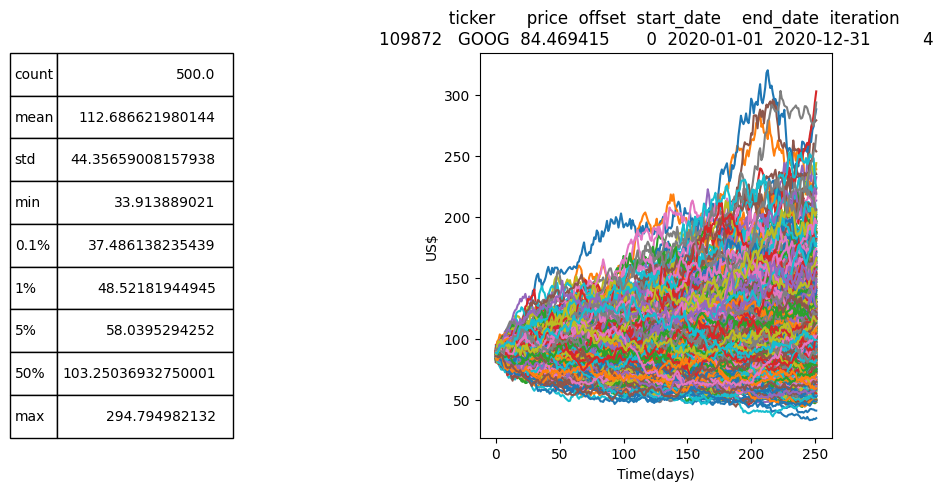

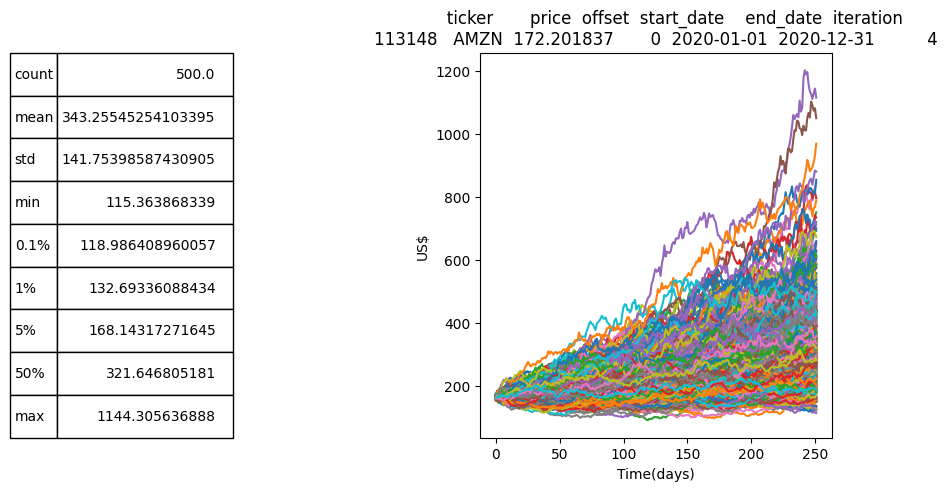

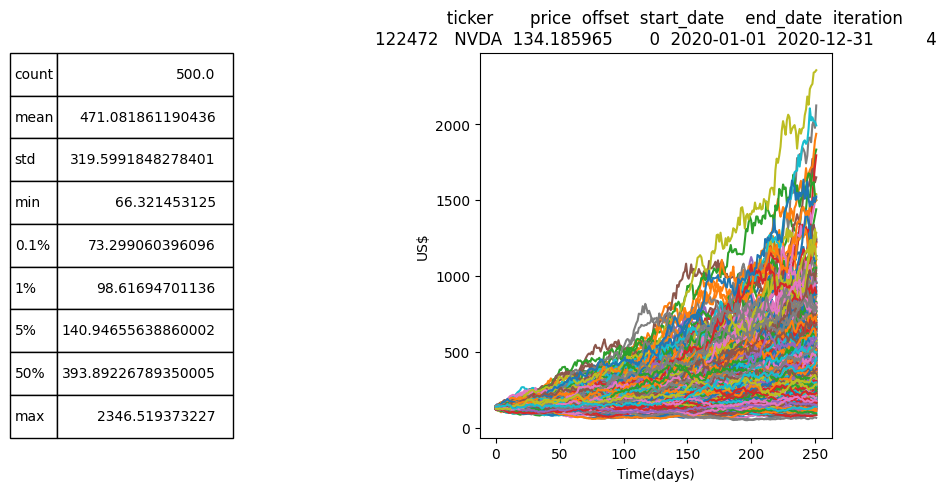

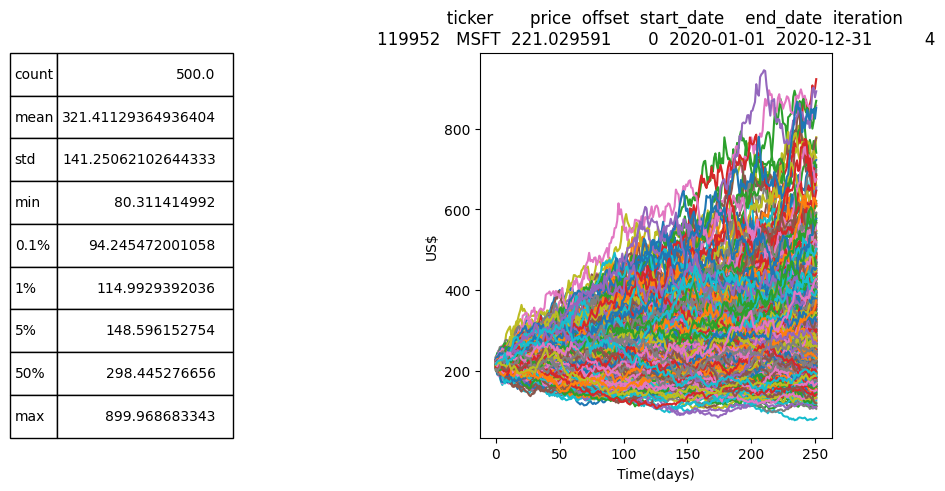

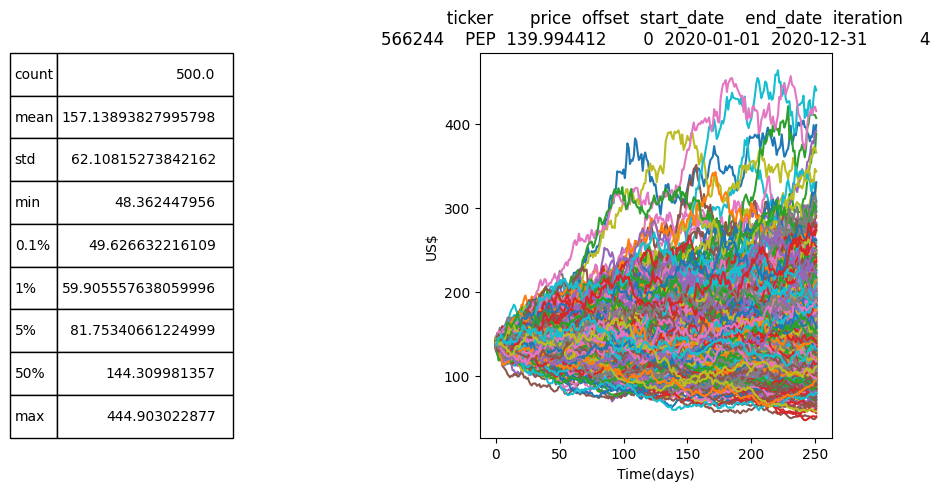

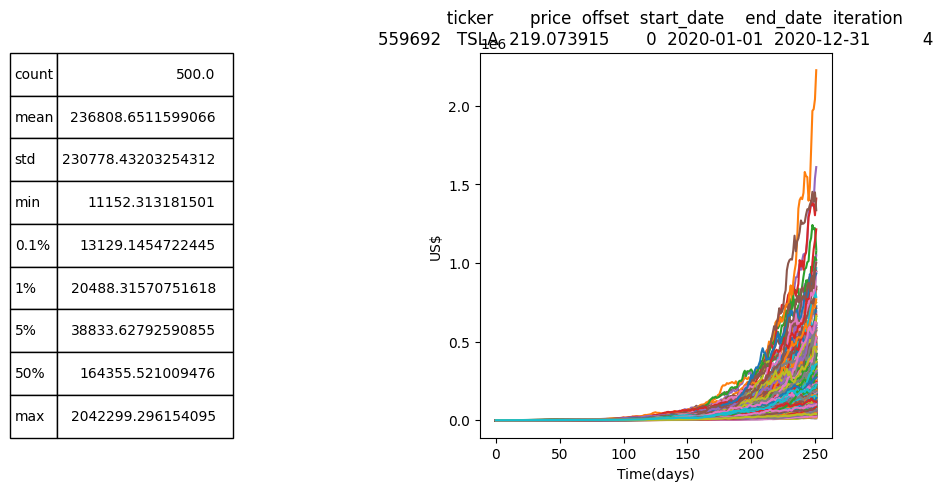

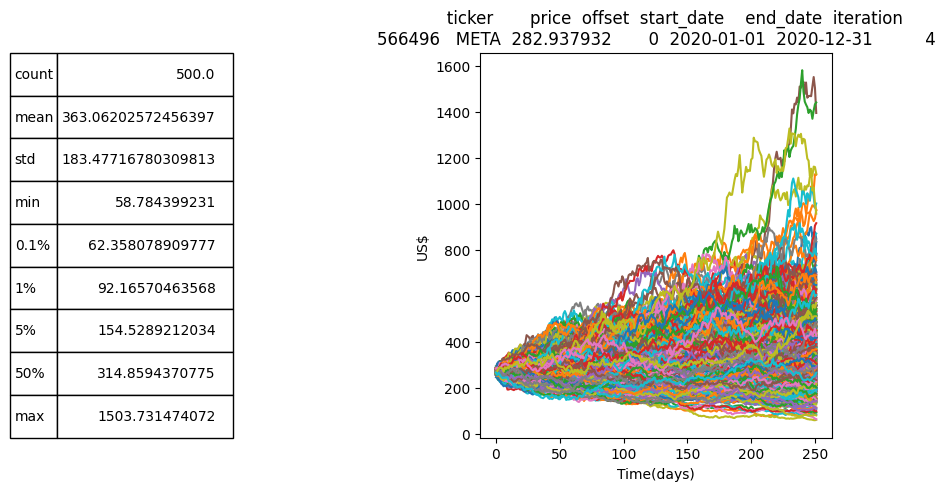

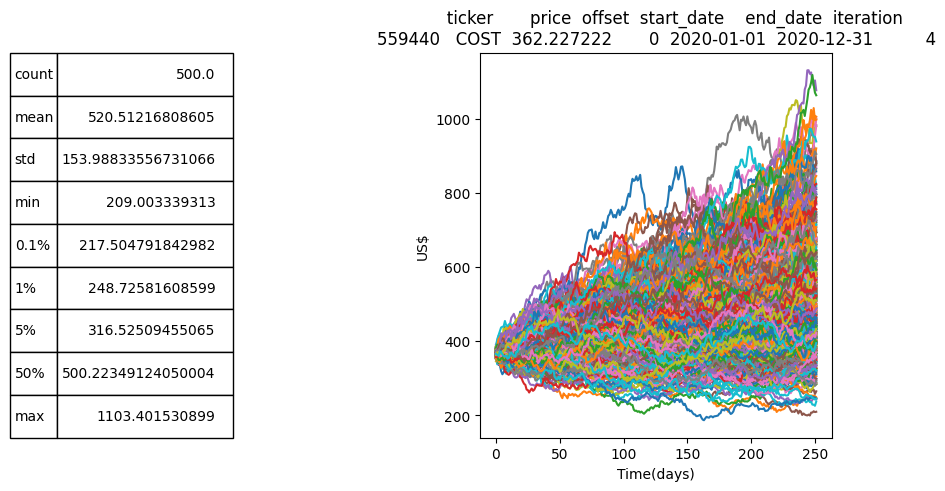

In [14]:
ticker_list = df.ticker.unique()
for t in ticker_list:
    plot_ticker(t,df)